       actual_mean_temp  actual_min_temp  actual_max_temp  average_min_temp  \
count        365.000000       365.000000       365.000000        365.000000   
mean          51.032877        42.857534        58.709589         43.517808   
std           20.353713        19.746650        21.425389         17.300760   
min            1.000000        -7.000000         7.000000         18.000000   
25%           35.000000        30.000000        39.000000         27.000000   
50%           53.000000        44.000000        62.000000         44.000000   
75%           70.000000        60.000000        79.000000         60.000000   
max           83.000000        74.000000        94.000000         68.000000   

       average_max_temp  record_min_temp  record_max_temp  \
count        365.000000       365.000000       365.000000   
mean          59.463014        21.284932        83.079452   
std           18.803842        23.140301        15.674461   
min           31.000000       -25.000000    

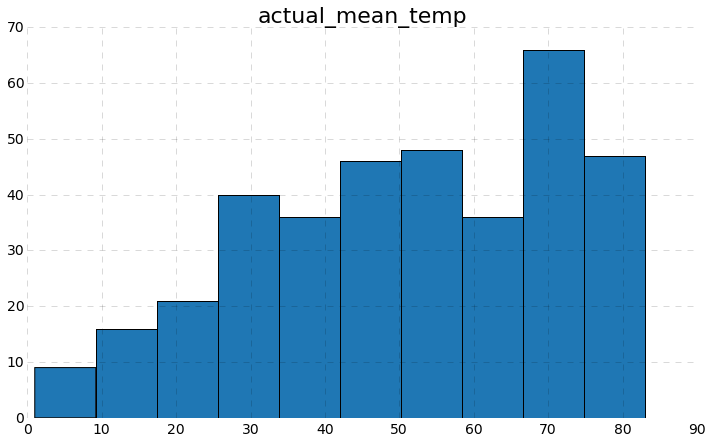

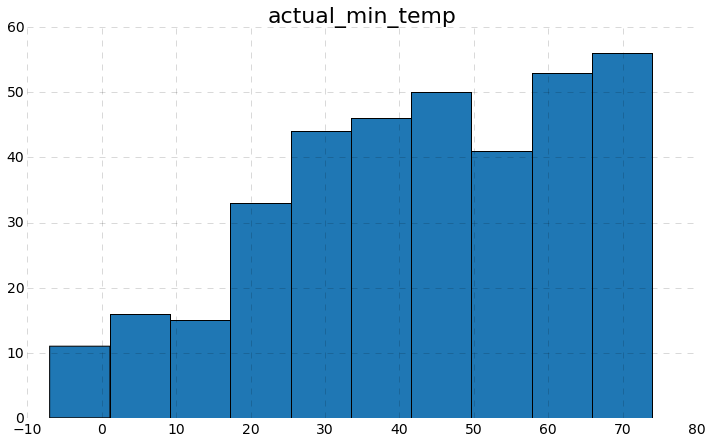

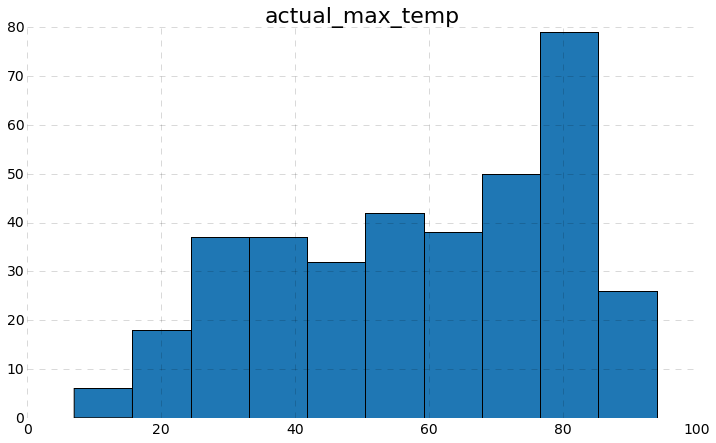

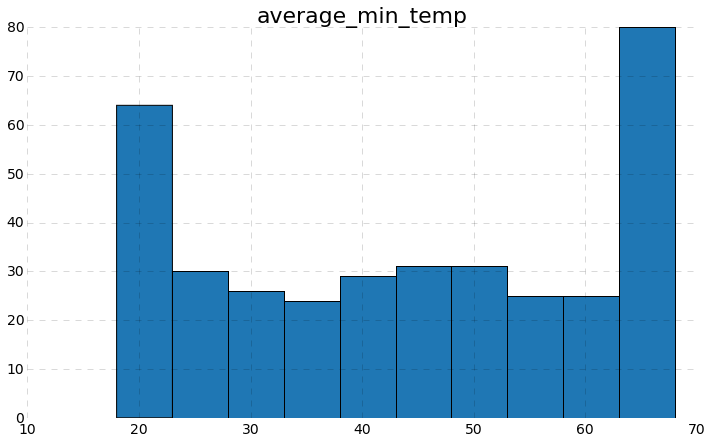

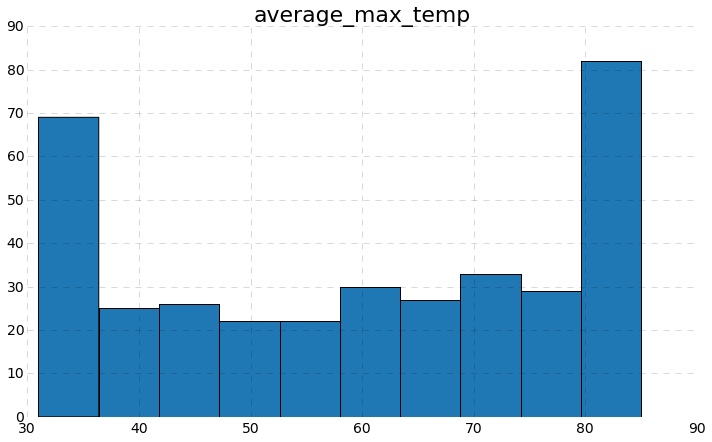

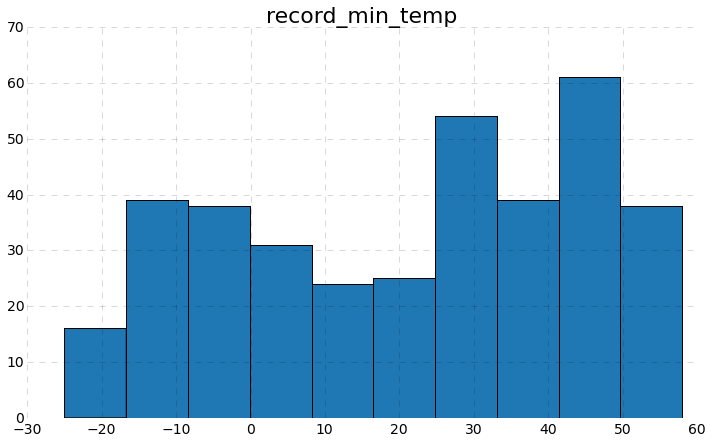

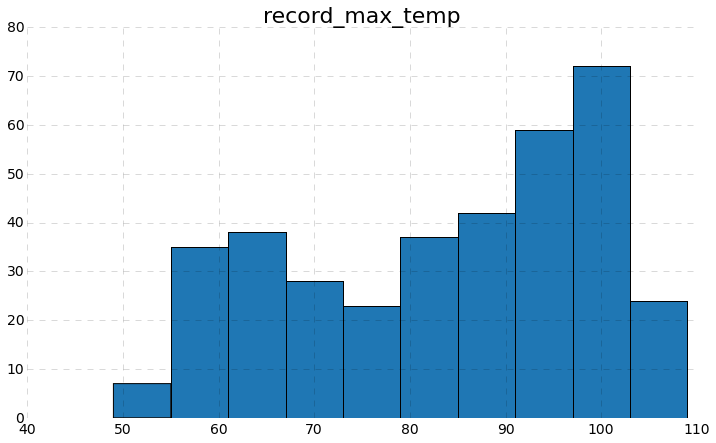

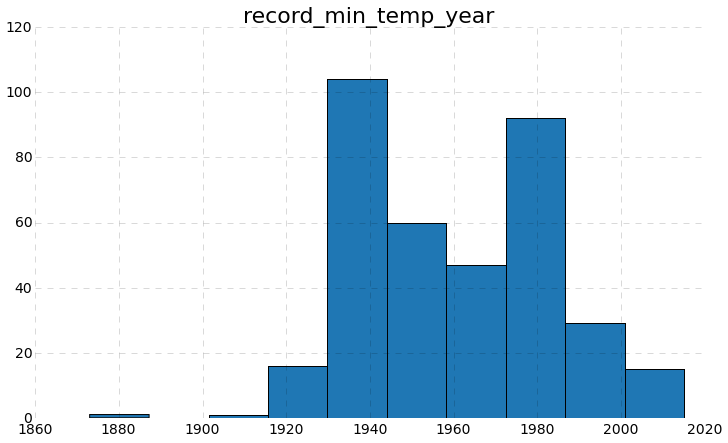

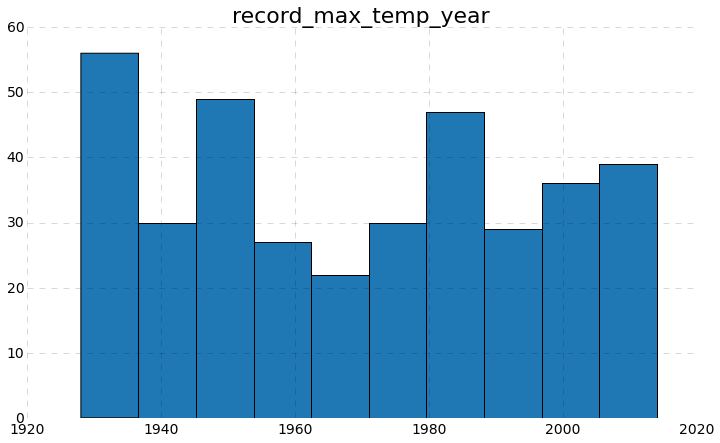

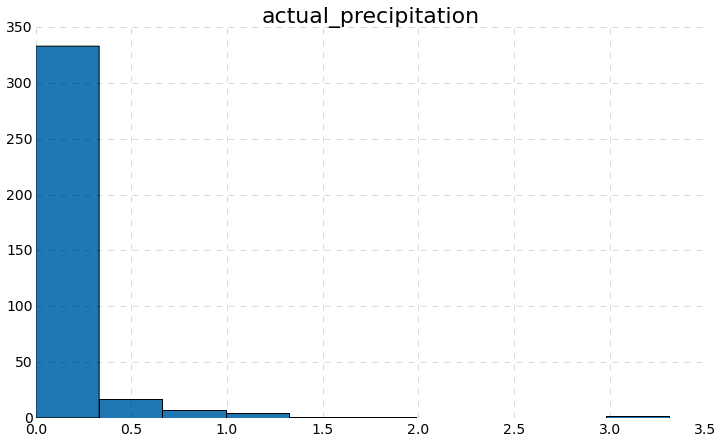

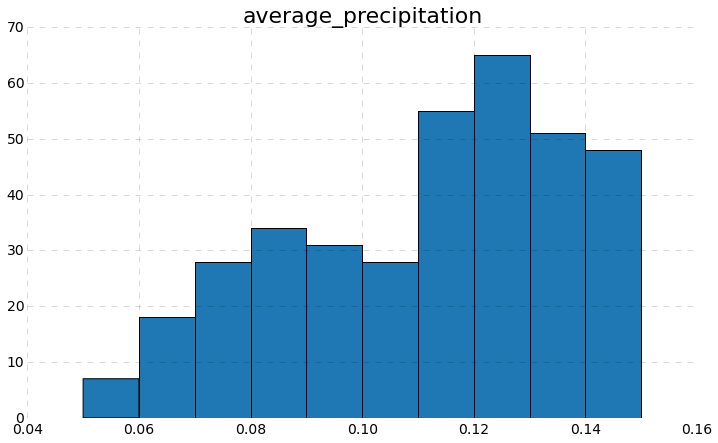

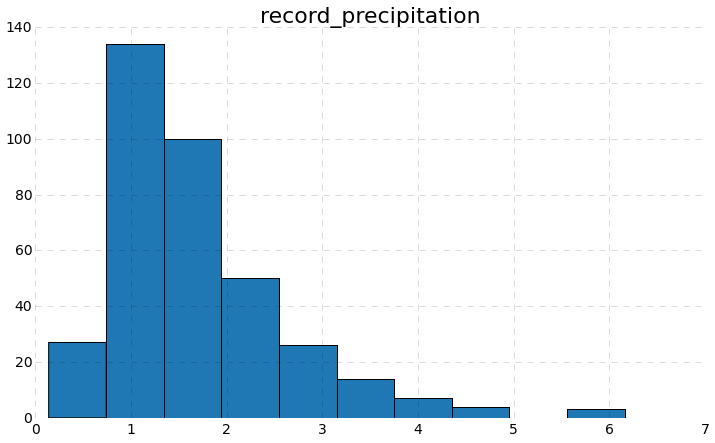

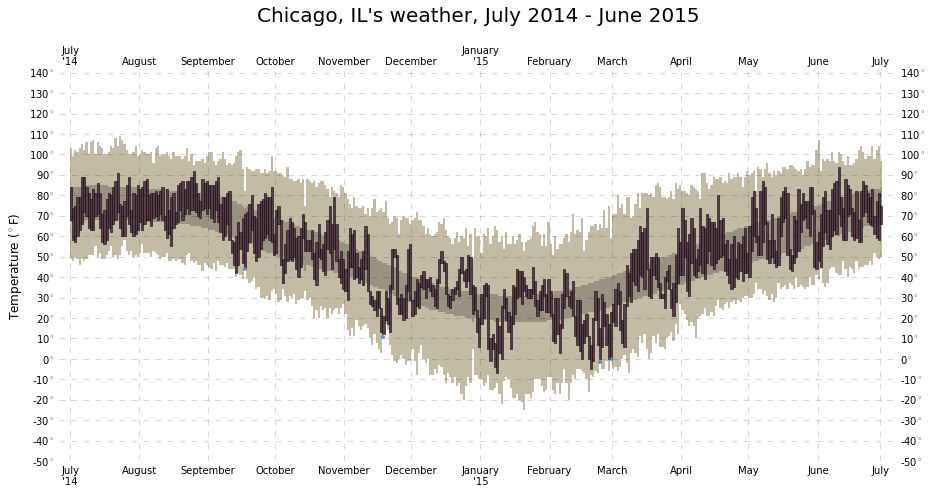

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
%matplotlib inline

'''
I also use a custom matplotlib style as the basis for these charts, which you
can find here: https://gist.githubusercontent.com/rhiever/d0a7332fe0beebfdc3d5/raw/223d70799b48131d5ce2723cd5784f39d7a3a653/tableau10.mplstyle
'''

weather_data = pd.read_csv('KMDW.csv', parse_dates=['date'])
print(weather_data.describe())

# Generate a bunch of histograms of the data to make sure that all of the data
# is in an expected range.
with plt.style.context('https://gist.githubusercontent.com/rhiever/d0a7332fe0beebfdc3d5/raw/223d70799b48131d5ce2723cd5784f39d7a3a653/tableau10.mplstyle'):
    for column in weather_data.columns:
        if column in ['date']:
            continue
        plt.figure()
        plt.hist(weather_data[column].values)
        plt.title(column)
        plt.savefig('{}.png'.format(column))

    # Make sure we're only plotting temperatures for July 2014 - June 2015
    weather_data_subset = weather_data[weather_data['date'] >= datetime(year=2014, month=7, day=1)]
    weather_data_subset = weather_data_subset[weather_data_subset['date'] < datetime(year=2015, month=6, day=30)].copy()
    weather_data_subset['day_order'] = range(len(weather_data_subset))

    day_order = weather_data_subset['day_order']
    record_max_temps = weather_data_subset['record_max_temp'].values
    record_min_temps = weather_data_subset['record_min_temp'].values
    average_max_temps = weather_data_subset['average_max_temp'].values
    average_min_temps = weather_data_subset['average_min_temp'].values
    actual_max_temps = weather_data_subset['actual_max_temp'].values
    actual_min_temps = weather_data_subset['actual_min_temp'].values

    fig, ax1 = plt.subplots(figsize=(15, 7))

    # Create the bars showing all-time record highs and lows
    plt.bar(day_order, record_max_temps - record_min_temps, bottom=record_min_temps,
            edgecolor='none', color='#C3BBA4', width=1)

    # Create the bars showing average highs and lows
    plt.bar(day_order, average_max_temps - average_min_temps, bottom=average_min_temps,
            edgecolor='none', color='#9A9180', width=1)

    # Create the bars showing this year's highs and lows
    plt.bar(day_order, actual_max_temps - actual_min_temps, bottom=actual_min_temps,
            edgecolor='black', linewidth=0.5, color='#5A3B49', width=1)

    new_max_records = weather_data_subset[weather_data_subset.record_max_temp <= weather_data_subset.actual_max_temp]
    new_min_records = weather_data_subset[weather_data_subset.record_min_temp >= weather_data_subset.actual_min_temp]

    # Create the dots marking record highs and lows for the year
    plt.scatter(new_max_records['day_order'].values + 0.5,
                new_max_records['actual_max_temp'].values + 1.25,
                s=15, zorder=10, color='#d62728', alpha=0.75, linewidth=0)

    plt.scatter(new_min_records['day_order'].values + 0.5,
                new_min_records['actual_min_temp'].values - 1.25,
                s=15, zorder=10, color='#1f77b4', alpha=0.75, linewidth=0)

    plt.ylim(-50, 141)
    plt.xlim(-5, 370)

    plt.yticks(range(-50, 141, 10), [r'{}$^\circ$'.format(x)
                                     for x in range(-50, 141, 10)], fontsize=10)
    plt.ylabel(r'Temperature ($^\circ$F)', fontsize=12)

    month_beginning_df = weather_data_subset[weather_data_subset['date'].apply(lambda x: True if x.day == 1 else False)]
    month_beginning_indeces = list(month_beginning_df['day_order'].values)
    month_beginning_names = list(month_beginning_df['date'].apply(lambda x: x.strftime("%B")).values)
    month_beginning_names[0] += '\n\'14'
    month_beginning_names[6] += '\n\'15'

    # Add the last month label manually
    month_beginning_indeces += [weather_data_subset['day_order'].values[-1]]
    month_beginning_names += ['July']

    plt.xticks(month_beginning_indeces,
               month_beginning_names,
               fontsize=10)

    ax2 = ax1.twiny()
    plt.xticks(month_beginning_indeces,
               month_beginning_names,
               fontsize=10)

    plt.xlim(-5, 370)
    plt.grid(False)

    ax3 = ax1.twinx()
    plt.yticks(range(-50, 141, 10), [r'{}$^\circ$'.format(x)
                                     for x in range(-50, 141, 10)], fontsize=10)
    plt.ylim(-50, 141)
    plt.grid(False)

    plt.title('Chicago, IL\'s weather, July 2014 - June 2015\n\n', fontsize=20)

    plt.savefig('chicago-weather-july14-june15.png')